Import libraries


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets

In [28]:
df = pd.read_csv('sentimentdataset.csv')
display(df.head())

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [29]:
df.shape

(732, 15)

In [30]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

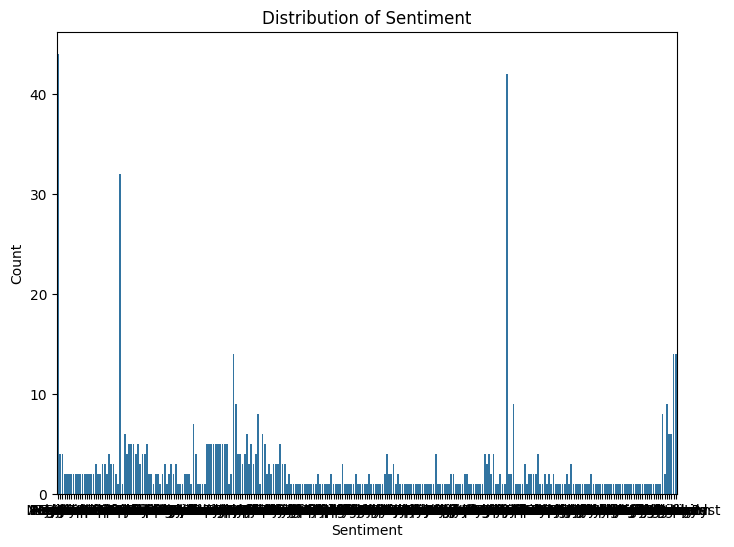

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

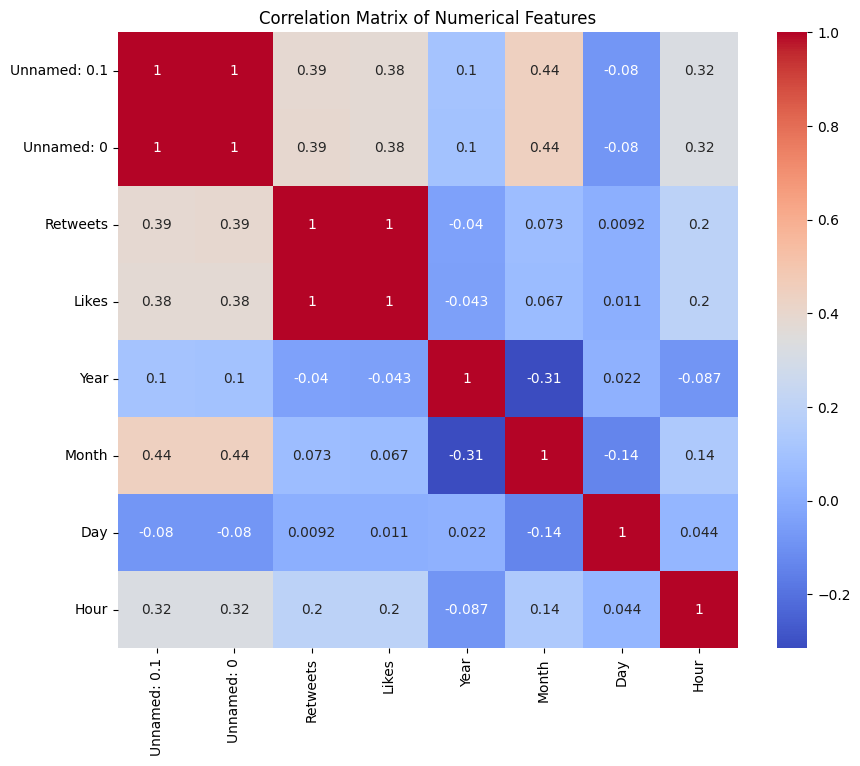

In [32]:
numerical_features = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

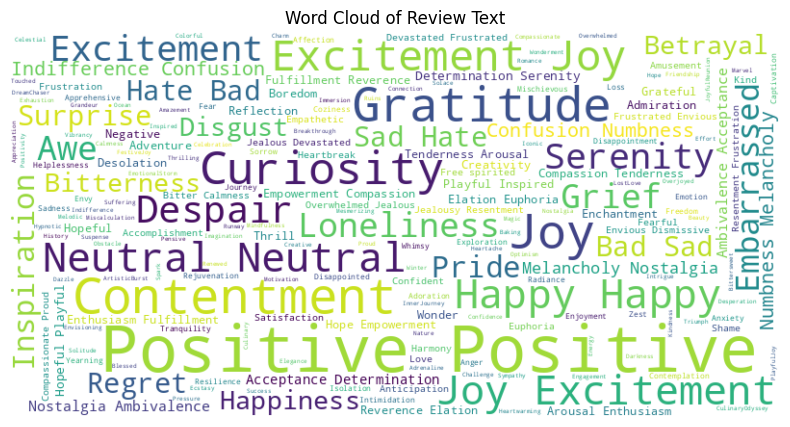

In [33]:
from wordcloud import WordCloud
text_data = ' '.join(df['Sentiment'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

Year with the most movie releases: 736


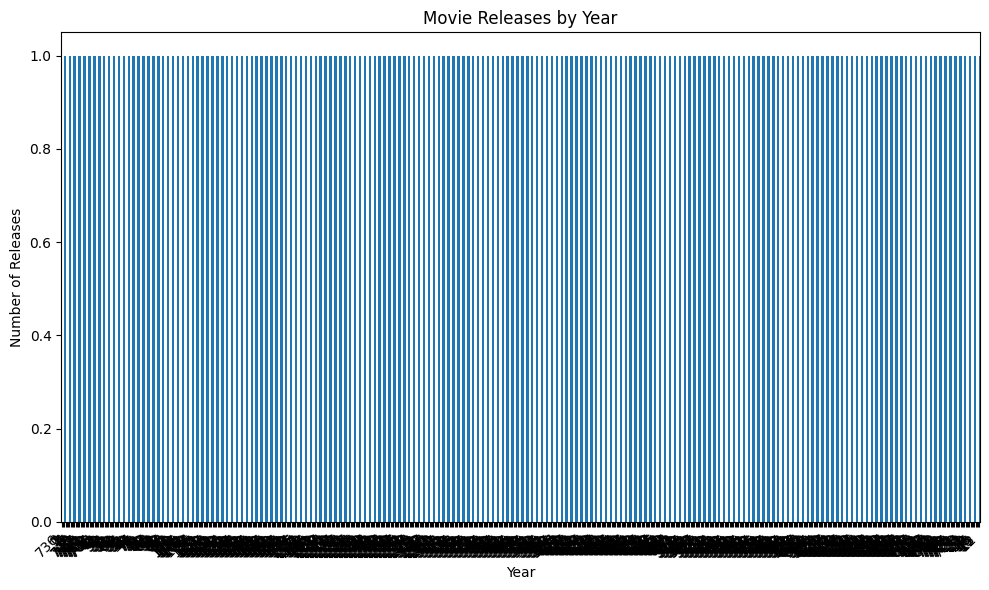

In [34]:
release_year_counts = df['Unnamed: 0'].value_counts()
most_frequent_year = release_year_counts.idxmax()
print("Year with the most movie releases:", most_frequent_year)
plt.figure(figsize=(10, 6))
release_year_counts.plot(kind='bar')
plt.title('Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

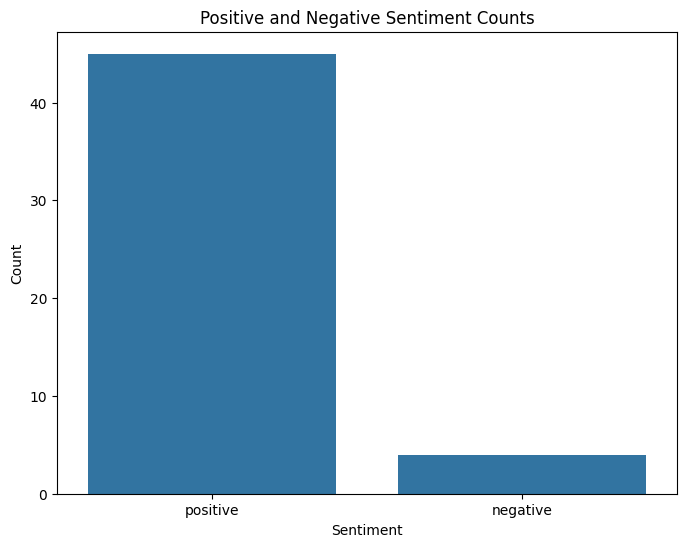

Sentiment Counts:
Positive: 45
Negative: 4


In [35]:
sentiment_column = 'Sentiment'
df[sentiment_column] = df[sentiment_column].str.lower().str.strip()
sentiment_counts = df[sentiment_column].value_counts()

positive_negative_counts = sentiment_counts[sentiment_counts.index.isin(['positive', 'negative'])]
plt.figure(figsize=(8, 6))
sns.barplot(x=positive_negative_counts.index, y=positive_negative_counts.values)
plt.title('Positive and Negative Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
print("Sentiment Counts:")
if 'positive' in positive_negative_counts:
    print(f"Positive: {positive_negative_counts['positive']}")
else:
    print("Positive: 0")

if 'negative' in positive_negative_counts:
    print(f"Negative: {positive_negative_counts['negative']}")
else:
    print("Negative: 0")

In [36]:
sentiment_column = 'Sentiment'
df[sentiment_column] = df[sentiment_column].str.lower().str.strip()
sentiment_types = df[sentiment_column].unique()
print("Sentiment Types:", sentiment_types)
sentiment_encoded = pd.get_dummies(df[sentiment_column], prefix='sentiment')
df = pd.concat([df, sentiment_encoded], axis=1)
feature1 = 'sentiment_positive'
feature2 = 'sentiment_negative'

Sentiment Types: ['positive' 'negative' 'neutral' 'anger' 'fear' 'sadness' 'disgust'
 'happiness' 'joy' 'love' 'amusement' 'enjoyment' 'admiration' 'affection'
 'awe' 'disappointed' 'surprise' 'acceptance' 'adoration' 'anticipation'
 'bitter' 'calmness' 'confusion' 'excitement' 'kind' 'pride' 'shame'
 'elation' 'euphoria' 'contentment' 'serenity' 'gratitude' 'hope'
 'empowerment' 'compassion' 'tenderness' 'arousal' 'enthusiasm'
 'fulfillment' 'reverence' 'despair' 'grief' 'loneliness' 'jealousy'
 'resentment' 'frustration' 'boredom' 'anxiety' 'intimidation'
 'helplessness' 'envy' 'regret' 'curiosity' 'indifference' 'numbness'
 'melancholy' 'nostalgia' 'ambivalence' 'determination' 'zest' 'hopeful'
 'proud' 'grateful' 'empathetic' 'compassionate' 'playful' 'free-spirited'
 'inspired' 'confident' 'bitterness' 'yearning' 'fearful' 'apprehensive'
 'overwhelmed' 'jealous' 'devastated' 'frustrated' 'envious' 'dismissive'
 'thrill' 'bittersweet' 'overjoyed' 'inspiration' 'motivation'
 'contem

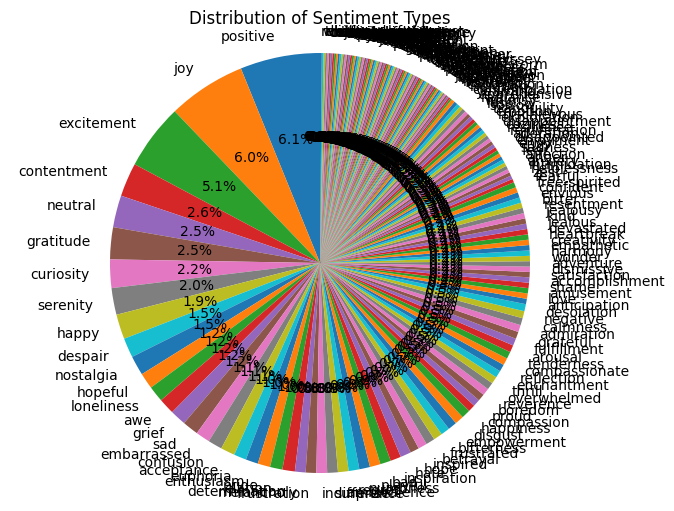

In [38]:
sentiment_column = 'Sentiment'
df[sentiment_column] = df[sentiment_column].str.lower().str.strip()
sentiment_counts = df[sentiment_column].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Types')
plt.axis('equal')
plt.show()

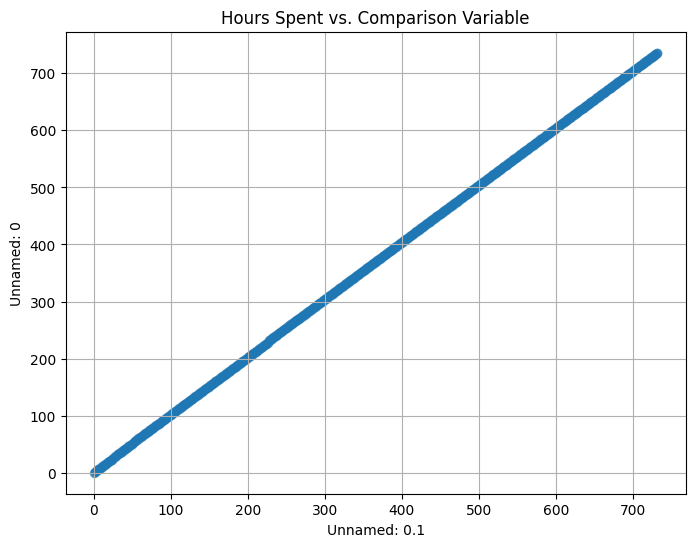

In [39]:
hours_spent_column = 'Unnamed: 0'
comparison_column = 'Unnamed: 0.1'

plt.figure(figsize=(8, 6))
plt.scatter(df[comparison_column], df[hours_spent_column], alpha=0.5)
plt.title('Hours Spent vs. Comparison Variable')
plt.xlabel(comparison_column)
plt.ylabel(hours_spent_column)
plt.grid(True)
plt.show()

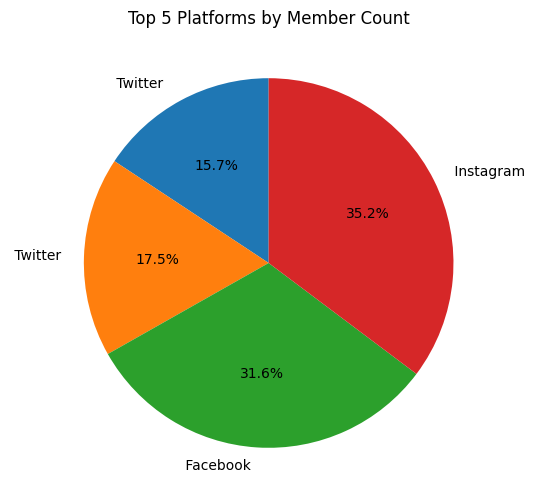

In [40]:
platform_column = 'Unnamed: 0'
platform_names_column = 'Platform'

platform_member_counts = df.groupby(platform_names_column)[platform_column].count()
top_5_platforms = platform_member_counts.sort_values(ascending=True).head(5)

plt.figure(figsize=(8, 6))
plt.pie(top_5_platforms.values, labels=top_5_platforms.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Platforms by Member Count')
plt.show()

In [41]:
sentiment_column = 'Sentiment'
df[sentiment_column] = df[sentiment_column].str.lower().str.strip()
print(df.columns)
hashtag_column = 'Sentiment'

def count_hashtags(hashtags_string, target_hashtags):
    if pd.isnull(hashtags_string):
        return 0
    hashtags_list = hashtags_string.split(',')
    count = sum(1 for hashtag in hashtags_list if hashtag.strip() in target_hashtags)
    return count

target_hashtags = ['#Gratitude', '#Tech', '#Innovation']
df['Hashtag'] = df[hashtag_column].apply(lambda x: count_hashtags(x, target_hashtags))
users_with_hashtags = df[df['Hashtag'] > 0]
hashtag_counts = {hashtag: users_with_hashtags[hashtag_column].str.contains(hashtag, na=False).sum() for hashtag in target_hashtags}
print("Hashtag Counts:")
for hashtag, count in hashtag_counts.items():
    print(f"{hashtag}: {count} users")

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes',
       ...
       'sentiment_tranquility', 'sentiment_triumph', 'sentiment_vibrancy',
       'sentiment_whimsy', 'sentiment_whispers of the past',
       'sentiment_winter magic', 'sentiment_wonder', 'sentiment_wonderment',
       'sentiment_yearning', 'sentiment_zest'],
      dtype='object', length=206)
Hashtag Counts:
#Gratitude: 0 users
#Tech: 0 users
#Innovation: 0 users


In [42]:
sentiment_column = 'Sentiment'
df[sentiment_column] = df[sentiment_column].str.lower().str.strip()
sentiment_counts = df[sentiment_column].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

print("\nSentiment Proportions:")
print(sentiment_counts / len(df))
majority_class = sentiment_counts.idxmax()
print("\nMajority Class:", majority_class)

Sentiment Counts:
Sentiment
positive                45
joy                     44
excitement              37
contentment             19
neutral                 18
                        ..
celestial wonder         1
nature's beauty          1
thrilling journey        1
whispers of the past     1
relief                   1
Name: count, Length: 191, dtype: int64

Sentiment Proportions:
Sentiment
positive                0.061475
joy                     0.060109
excitement              0.050546
contentment             0.025956
neutral                 0.024590
                          ...   
celestial wonder        0.001366
nature's beauty         0.001366
thrilling journey       0.001366
whispers of the past    0.001366
relief                  0.001366
Name: count, Length: 191, dtype: float64

Majority Class: positive


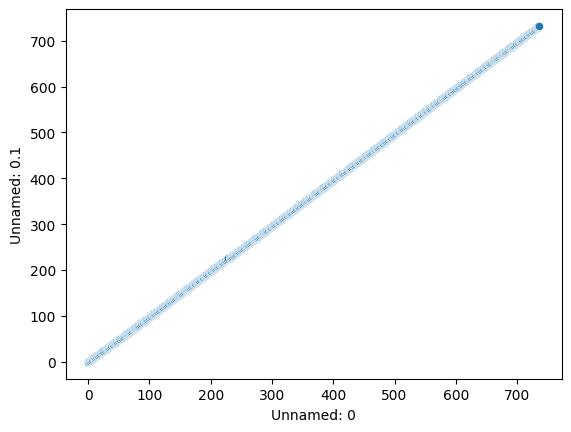

In [43]:
sns.scatterplot(x='Unnamed: 0', y='Unnamed: 0.1', data=df)
plt.show()

In [44]:
fig_bar = px.bar(df, x='Sentiment', title='Distribution of Sentiment')
fig_bar.show()

In [45]:
numerical_features = df.select_dtypes(include=['number']).columns
corr_matrix = df[numerical_features].corr()
fig_heatmap = px.imshow(corr_matrix,
                        x=numerical_features,
                        y=numerical_features,
                        title='Correlation Matrix of Numerical Features')
fig_heatmap.show()